In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df_1 = pd.read_csv('D:/MSBA_US/Spring Semester/Pricing/project/train_grouped.csv')
df= pd.read_csv('D:/MSBA_US/Spring Semester/Pricing/project/train_full.csv')

In [19]:
df.head(5)

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,Beverages,Biryani,...,region2,region3,region4,region5,region6,region7,region8,TYPE_A,TYPE_B,TYPE_C
0,1379560,1,136.83,152.29,0,0,177,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1018704,2,135.83,152.29,0,0,323,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1196273,3,132.92,133.92,0,0,96,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1116527,4,135.86,134.86,0,0,163,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1343872,5,146.50,147.50,0,0,215,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
df_1.head(5)

,week,checkout_price,base_price,num_orders,emailer_for_promotion,homepage_featured,op_area,Beverages,Biryani,Desert,...,region2,region3,region4,region5,region6,region7,region8,TYPE_A,TYPE_B,TYPE_C
0,1,965809.26,1018365.32,792261,357,414,4.079877,55.0,4.0,15.0,...,45.0,4.0,99.0,3.0,44.0,17.0,2.0,128.0,45.0,45.0
1,2,938092.43,1005779.20,787084,621,514,4.085014,55.0,8.0,17.0,...,48.0,4.0,96.0,3.0,45.0,16.0,2.0,127.0,45.0,46.0
2,3,948560.28,1008352.05,695262,104,316,4.078682,58.0,9.0,17.0,...,48.0,3.0,97.0,3.0,44.0,16.0,2.0,127.0,45.0,45.0
3,4,953833.69,1006446.90,743529,0,292,4.087747,54.0,9.0,13.0,...,47.0,3.0,95.0,2.0,44.0,15.0,2.0,123.0,44.0,45.0
4,5,901141.58,1001075.16,1198675,337,466,4.077824,43.0,7.0,11.0,...,37.0,0.0,79.0,0.0,38.0,15.0,2.0,103.0,36.0,36.0


In [21]:
df.columns

Index(['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'op_area', 'Beverages', 'Biryani',
       'Desert', 'Extras', 'Fish', 'Other Snacks', 'Pasta', 'Pizza',
       'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup', 'Starters',
       'Continental', 'Indian', 'Italian', 'Thai', 'city1', 'city10', 'city11',
       'city12', 'city13', 'city14', 'city15', 'city16', 'city17', 'city18',
       'city19', 'city2', 'city20', 'city21', 'city22', 'city23', 'city24',
       'city25', 'city26', 'city27', 'city28', 'city29', 'city3', 'city30',
       'city31', 'city32', 'city33', 'city34', 'city35', 'city36', 'city37',
       'city38', 'city39', 'city4', 'city40', 'city41', 'city42', 'city43',
       'city44', 'city45', 'city46', 'city47', 'city48', 'city49', 'city5',
       'city50', 'city51', 'city6', 'city7', 'city8', 'city9', 'region1',
       'region2', 'region3', 'region4', 'region5', 'region6', 'region7',
       'region8', '

In [33]:
features_region = ['region1','region2', 'region3', 'region4', 'region5', 'region6', 'region7','region8']
features_city = ['city1', 'city10', 'city11',
       'city12', 'city13', 'city14', 'city15', 'city16', 'city17', 'city18',
       'city19', 'city2', 'city20', 'city21', 'city22', 'city23', 'city24',
       'city25', 'city26', 'city27', 'city28', 'city29', 'city3', 'city30',
       'city31', 'city32', 'city33', 'city34', 'city35', 'city36', 'city37',
       'city38', 'city39', 'city4', 'city40', 'city41', 'city42', 'city43',
       'city44', 'city45', 'city46', 'city47', 'city48', 'city49', 'city5',
       'city50', 'city51', 'city6', 'city7', 'city8']
features_cuisine = [ 'Continental', 'Indian', 'Italian', 'Thai']
features_dishes = ['Beverages', 'Biryani',
       'Desert', 'Extras', 'Fish', 'Other Snacks', 'Pasta', 'Pizza',
       'Rice Bowl', 'Salad', 'Sandwich', 'Seafood', 'Soup', 'Starters',]

In [10]:
# Variable
# Definition
# id - Unique ID
# week - Week No
# center_id - Unique ID for fulfillment center
# meal_id - Unique ID for Meal
# checkout_price - Final price including discount, taxes & delivery charges 
# base_price - Base price of the meal 
# emailer_for_promotion - Email sent for promotion of meal 
# homepage_featured - Meal featured at homepage
# num_orders - (Target) Orders Count
# city_code  - Unique code for city 
# region_code- Unique code for region
# center_type -Anonymized center type
# op_area - Area of operation (in km^2)
# category -Type of meal (beverages/snacks/soups....)
# cuisine - Meal cuisine (Indian/Italian/...)

In [31]:
df.shape

(456548, 88)

In [32]:
len(df.week.unique())

145

In [92]:
# Questions to answer -
# 1. Number of orders/week
# 2. Orders/region
# 3. Popular cuisine
# 3. Popular Food
# 4. Popular cities
# 5. Correlation between area and order 

### Number of order per week

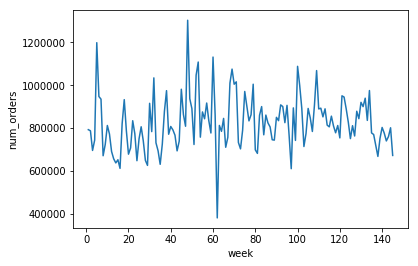

In [9]:
ax = sns.lineplot(x="week", y="num_orders", data=df_1)

### Orders per region

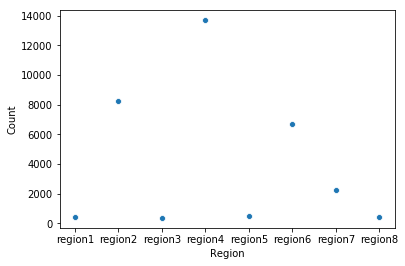

In [58]:
m = df[features_region].sum(axis=0).to_frame().reset_index().rename(columns={0: 'Count','index': 'Region'})
ax = sns.scatterplot(x='Region',y='Count',data=m)

Region 4 has highest orders 

### Popular cuisine  

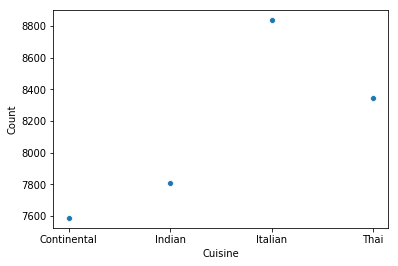

In [74]:
m =df[features_cuisine].sum(axis=0).to_frame().reset_index().rename(columns={0: 'Count','index': 'Cuisine'})
ax = sns.scatterplot(x='Cuisine',y='Count',data=m)

Italian has the highest number of orders

### Popular food

In [72]:
df[features_dishes].sum(axis=0).to_frame().reset_index().rename(columns={0: 'Count','index': 'Food'}).sort_values(by='Count',ascending =False)

,Food,Count
0,Beverages,8891.0
8,Rice Bowl,2309.0
9,Salad,2309.0
10,Sandwich,2308.0
7,Pizza,2306.0
2,Desert,2113.0
5,Other Snacks,2104.0
13,Starters,1984.0
6,Pasta,1927.0
11,Seafood,1697.0


Beverages are mostly ordered a lot, followed by Rice Bowl, Salad and Sandwich

### Popular Cities

In [76]:
df[features_city].sum(axis=0).to_frame().reset_index().rename(columns={0: 'Count','index': 'City'}).sort_values(by='Count',ascending =False).head(5)

,City,Count
9,city18,3962.0
23,city30,1436.0
49,city8,971.0
48,city7,930.0
15,city23,927.0


City18 residents order a lot!

In [80]:
df_1[['num_orders','emailer_for_promotion']].corr()

,num_orders,emailer_for_promotion
num_orders,1.000000,0.484683
emailer_for_promotion,0.484683,1.000000


Number of Orders and emailing for promotion have a correlation of 0.48

In [83]:
df_1[['num_orders','homepage_featured']].corr()

,num_orders,homepage_featured
num_orders,1.000000,0.477732
homepage_featured,0.477732,1.000000
